# Face API Sample

face api는 인물 분석을 통해서 다양한 정보를 제공해 줍니다. Azure Portal에서 Face API를 먼저 생성하고 접속에 필요한 URL과 subscription key를 가져와서 보여 줍니다.
관련된 라이브러리를 가져옵니다. request는 웹 통신을 위해서 가져오고 BytesIO, Image는 이미지를 처리하기 위해서 사용하고 있습니다. ImageDraw, ImageFont는 이미지 위에 선을 긋거나 글씨를 넣기 위해서 사용됩니다.

In [2]:
import requests
from io import BytesIO
from PIL import Image, ImageDraw, ImageFont

Subscription Key와 서비스의 주소를 설정합니다.

In [3]:
subscription_key = 'cfed609ad3ef4031bb274bb3e808e302'

In [4]:
faceDetection_url = 'https://facedetect00.cognitiveservices.azure.com/face/v1.0/detect'

분석에 사용할 이미지를 확인합니다.

In [5]:
image_url = 'https://postfiles.pstatic.net/MjAyMjAzMjZfMjE0/MDAxNjQ4MjI5NzAyNjMx.TFbl1FcaEdKeYKy01h8fLTsmGzdCRM-k6udJ1_TNV4kg.Arq2-riawQiNr9-qlec9qXAFK5_gcmsv9gmzvWxzLkwg.JPEG.snanyilovem/IMG_5885.JPG?type=w966'

In [6]:
img = Image.open(BytesIO(requests.get(image_url).content))

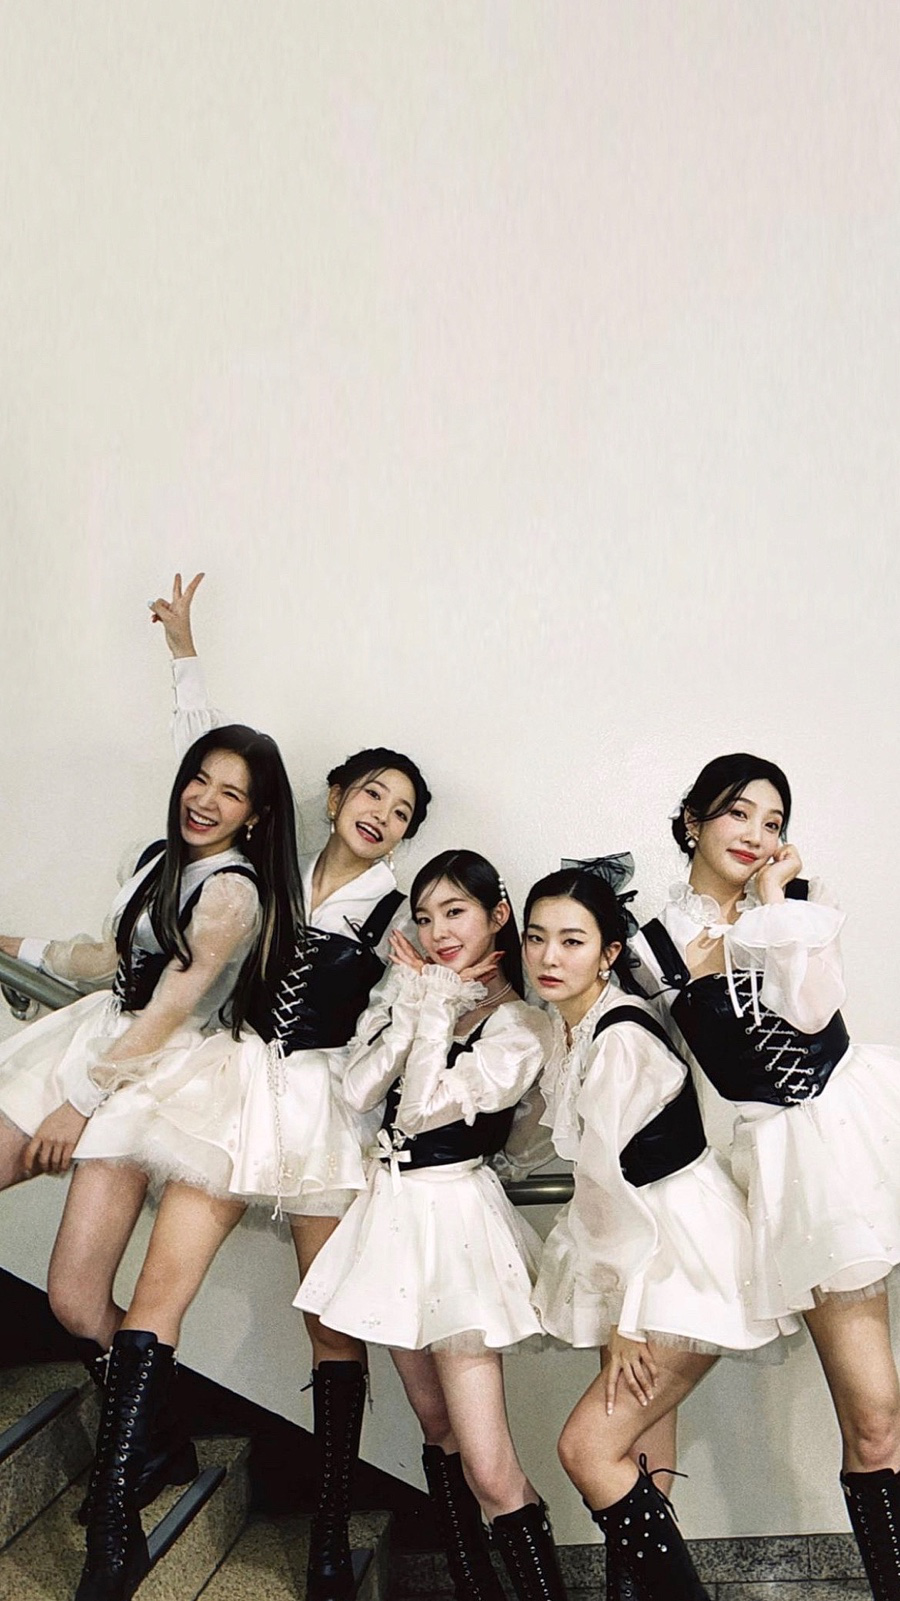

In [7]:
img

In [8]:
headers = {'Ocp-Apim-Subscription-key': subscription_key}
params ={
    'returnFaceID': 'true',
    'returnFaceAttributes': 'age,gender,emotion'
}

In [9]:
data = {'url' : image_url}

서비스를 호출해서 결과를 확인합니다.

In [10]:
response = requests.post(faceDetection_url,
                        headers=headers,
                        params=params,
                        json=data)

In [11]:
faces = response.json()

In [12]:
faces

[{'faceId': '0a684b7b-866a-4760-87bb-411209013f82',
  'faceRectangle': {'top': 919, 'left': 511, 'width': 80, 'height': 80},
  'faceAttributes': {'gender': 'female',
   'age': 25.0,
   'emotion': {'anger': 0.0,
    'contempt': 0.0,
    'disgust': 0.0,
    'fear': 0.0,
    'happiness': 0.0,
    'neutral': 0.969,
    'sadness': 0.031,
    'surprise': 0.0}}},
 {'faceId': '8a7dd597-7162-41c0-aa2f-54f8eea849ba',
  'faceRectangle': {'top': 797, 'left': 710, 'width': 79, 'height': 79},
  'faceAttributes': {'gender': 'female',
   'age': 24.0,
   'emotion': {'anger': 0.0,
    'contempt': 0.006,
    'disgust': 0.0,
    'fear': 0.0,
    'happiness': 0.945,
    'neutral': 0.049,
    'sadness': 0.001,
    'surprise': 0.0}}},
 {'faceId': 'a77ead65-b403-41fb-a7c0-dd3f70e104f8',
  'faceRectangle': {'top': 764, 'left': 171, 'width': 74, 'height': 74},
  'faceAttributes': {'gender': 'female',
   'age': 24.0,
   'emotion': {'anger': 0.0,
    'contempt': 0.0,
    'disgust': 0.0,
    'fear': 0.0,
    'happ

In [13]:
draw = ImageDraw.Draw(img)

In [17]:
for face in faces:
    
    rect = face['faceRectangle']
    
    left = rect['left']
    top = rect['top']
    width = rect['width']
    height = rect['height']
    
    draw.rectangle(((left,top),(left+width,top+height)),outline='red')
    
    face_info = face['faceAttributes']
    emotion = face_info['emotion']
    happiness = emotion['happiness']
    age = face_info['age']
    gender = face_info['gender']
    result = 'happiness:' + str(happiness*100) + ' Age:'  + str(age)
    
    draw.text((left,top), result, fill='red')


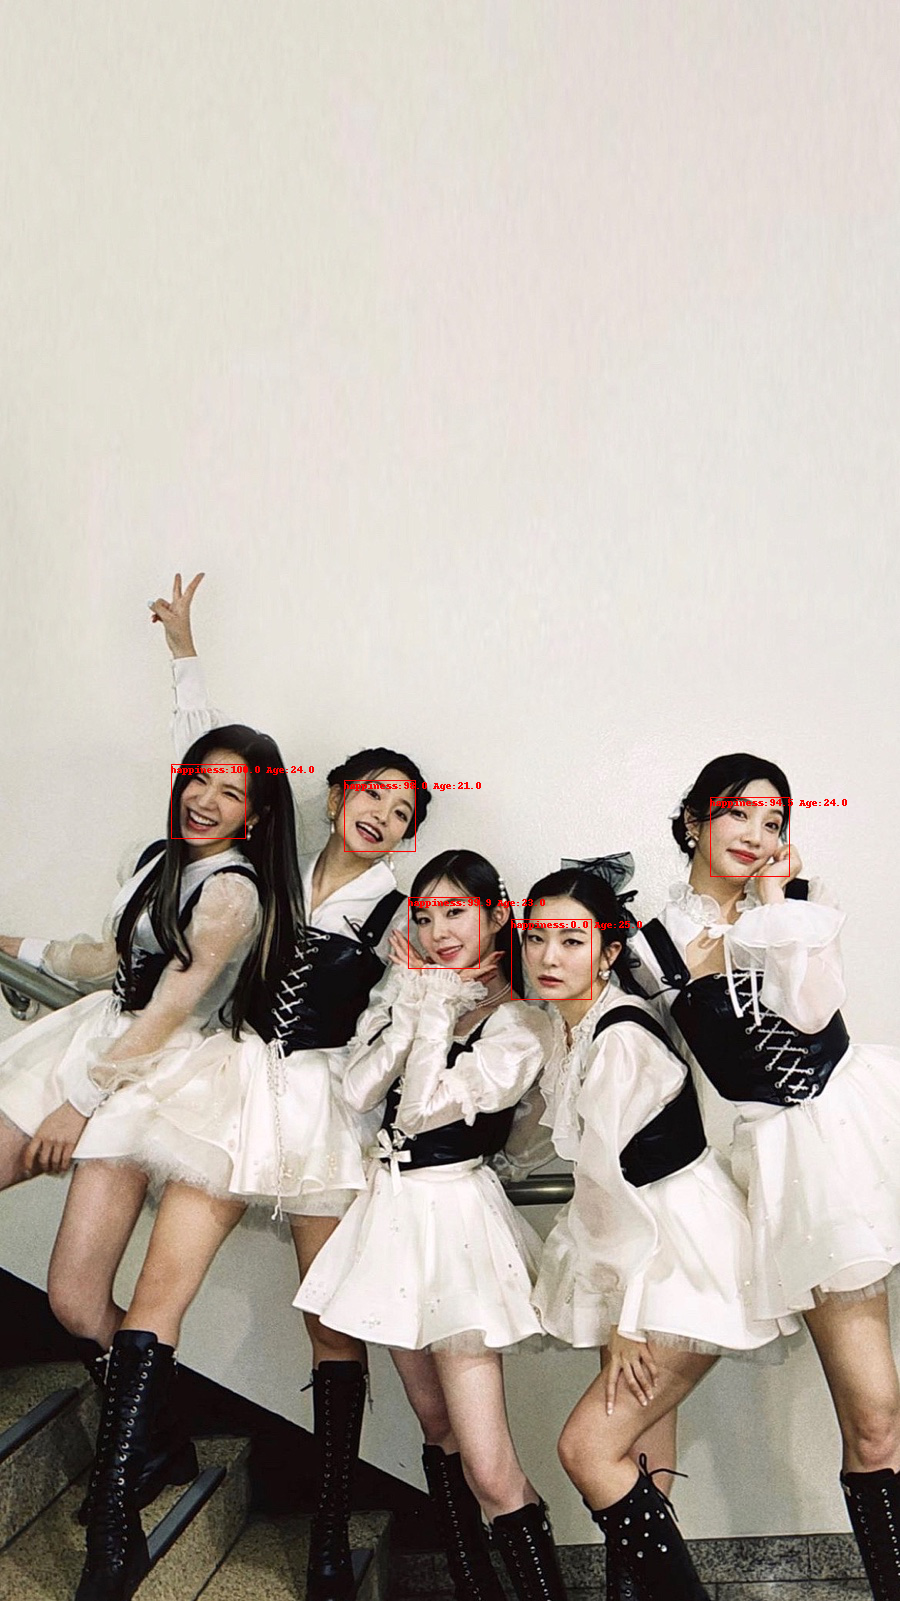

In [18]:
img